# AIE425 Intelligent Recommender Systems, Fall Semester 24/25
# Assignment #3: Dimensionality Reduction methods
# 221100674, Nabila Ahmed Ali

In [ ]:
import os

dataset_path = r"/content/TMDB user movie ratings.csv"


def validate_dataset_path(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"The dataset file was not found at: {path}")
    print(f"Dataset path exists: {path}")
validate_dataset_path(dataset_path)

Dataset path exists: /content/TMDB user movie ratings.csv


In [ ]:

def load_dataset(path):
    data = pd.read_csv(path)
    print(f"Dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
    return data


dataset = load_dataset(dataset_path)


print("Preview of the loaded dataset:")
print(dataset.head())

Dataset loaded successfully with 884 rows and 4 columns.
Preview of the loaded dataset:
   user_id  media_id  rating                   title
0        1     27205     8.3               Inception
1        1    157336     8.1            Interstellar
2        1       155     8.5         The Dark Knight
3        1    299536     8.3  Avengers: Infinity War
4        1       550     7.9              Fight Club


In [ ]:

if 'rating' in dataset.columns:
    def adjust_rating_scale(data, column, new_min=1, new_max=5):

        col = data[column]

        scaled_col = (col - col.min()) / (col.max() - col.min())
        data[column] = (scaled_col * (new_max - new_min) + new_min).round(2)
        print(f"Ratings scaled to range {new_min}-{new_max}.")
        return data


    dataset = adjust_rating_scale(dataset, column='rating', new_min=1, new_max=5)


    print("Adjusted dataset preview:")
    print(dataset.head())
else:
    print("'rating' column not found in dataset.")


Ratings scaled to range 1-5.
Adjusted dataset preview:
   user_id  media_id  rating                   title
0        1     27205    2.83               Inception
1        1    157336    2.50            Interstellar
2        1       155    3.17         The Dark Knight
3        1    299536    2.83  Avengers: Infinity War
4        1       550    2.17              Fight Club


In [ ]:
import pandas as pd


data = pd.read_csv('/content/TMDB user movie ratings.csv')


Tnu = data['user_id'].nunique()
Tni = data['media_id'].nunique()

print("Total number of users (Tnu):", Tnu)
print("Total number of items (Tni):", Tni)


Total number of users (Tnu): 60
Total number of items (Tni): 86


Count Ratings for Every Product

In [ ]:

ratings_count = data.groupby('media_id')['rating'].count()
print("\nRatings Count for TOP 5 Products :")
print(ratings_count.head())


Ratings Count for TOP 5 Products :
media_id
13     14
28     10
73     10
101     6
105     9
Name: rating, dtype: int64


# Distribution of Ratings and Sparsity

Dataset loaded successfully!
   user_id  media_id  rating                   title
0        1     27205     8.3               Inception
1        1    157336     8.1            Interstellar
2        1       155     8.5         The Dark Knight
3        1    299536     8.3  Avengers: Infinity War
4        1       550     7.9              Fight Club


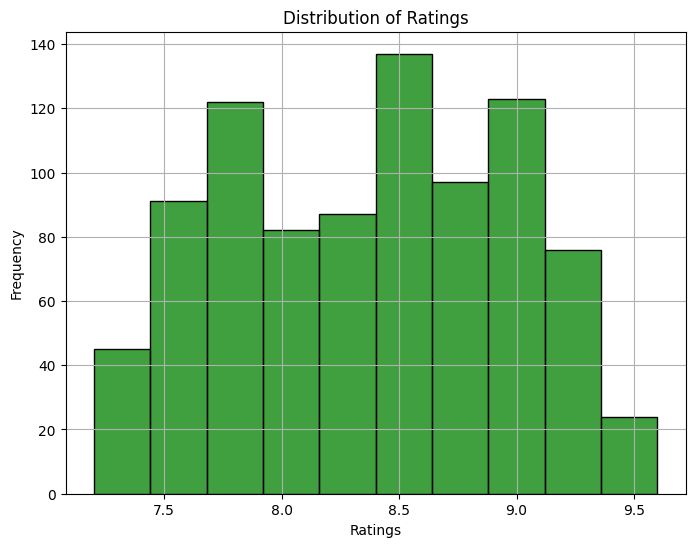


=== Sparsity and Bias ===
Total entries in the ratings matrix: 5160
Non-zero ratings: 884
Matrix sparsity: 0.8287


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "/content/TMDB user movie ratings.csv"
df = pd.read_csv(file_path)


print("Dataset loaded successfully!")
print(df.head())

plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10, color='green')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.grid()
plt.show()

print("\n=== Sparsity and Bias ===")

ratings_matrix = df.pivot(index='user_id', columns='media_id', values='rating')

num_total_entries = ratings_matrix.shape[0] * ratings_matrix.shape[1]
num_non_zero_entries = np.count_nonzero(~ratings_matrix.isnull())
sparsity_ratio = 1 - (num_non_zero_entries / num_total_entries)

print(f"Total entries in the ratings matrix: {num_total_entries}")
print(f"Non-zero ratings: {num_non_zero_entries}")
print(f"Matrix sparsity: {sparsity_ratio:.4f}")


# Two Lowest-Rated Items

In [ ]:

print("\n Two Lowest-Rated Items are:")
item_avg_ratings = data.groupby('media_id')['rating'].mean()
lowest_rated_items = item_avg_ratings.nsmallest(2).index.tolist()
I1, I2 = lowest_rated_items[0], lowest_rated_items[1]
print(f"Lowest-Rated Items: I1 = {I1}, I2 = {I2}")


 Two Lowest-Rated Items are:
Lowest-Rated Items: I1 = 8587, I2 = 42269


# Saving the Results

In [ ]:

print("\nSaving the Results")
results = {
    'Total Users (Tnu)': Tnu,
    'Total Items (Tni)': Tni,
    'Lowest Rated Items': [I1, I2]
}


for key, value in results.items():
    print(f"{key}: {value}")



Saving the Results
Total Users (Tnu): 60
Total Items (Tni): 86
Lowest Rated Items: [8587, 42269]


# Part 1: PCA Method with Mean-Filling

In [ ]:

print("\n Average Ratings for Target Items: ")
target_items = [8587, 42269]
average_ratings = data[data['media_id'].isin(target_items)].groupby('media_id')['rating'].mean()
for item, avg in average_ratings.items():
    print(f"Item {item}: Average Rating = {avg:.2f}")


 Average Ratings for Target Items: 
Item 8587: Average Rating = 7.78
Item 42269: Average Rating = 7.90


# Replace Missing Ratings with Mean-Filling

In [ ]:

print("\n=== Matrix with Mean-Filled and Scaled Values ===")
user_item_matrix = data.pivot(index='user_id', columns='media_id', values='rating')


mean_filled_matrix = user_item_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)


def scale_to_1_5(matrix):
    """
    Scale all values in the matrix to the range of 1 to 5.
    """
    col_min = matrix.min(axis=0)
    col_max = matrix.max(axis=0)
    scaled_matrix = (matrix - col_min) / (col_max - col_min) * 4 + 1
    return scaled_matrix

scaled_matrix = scale_to_1_5(mean_filled_matrix)


sample_matrix = scaled_matrix.head()
print(sample_matrix.to_string())



=== Matrix with Mean-Filled and Scaled Values ===
media_id   13        28        73        101       105      120       121       122       128       129      155       207       238       240       274       278       311       335      346       389       423       424       429       497       510       539       550       567       598       599      637       670      680       769      807      901       914       975       1585      1891      3082      3782      4935      8587      10376    10494     11216     12477     12493     14537     18491     19404     25237     27205     40096     42269     77338    92321    110420    157336   244786    255709    265177   283566   299534    299536    324857    372058   378064    447362    490132    496243    504253   508965    527641    569094    572154    630566    637920    644479    696374    724089    761053    995133   1084736   1184918
user_id                                                                                         

# Generate Covariance Matrix

In [ ]:

print("\n Covariance Matrix:")
cov_matrix = mean_filled_matrix.cov()


print("Covariance Matrix :")
print(cov_matrix.iloc[:5, :5].to_string())


=== Covariance Matrix ===
Covariance Matrix (Sample):
media_id           13            28            73            101           105
media_id                                                                      
13        3.811138e-02  2.674105e-31  3.355932e-03  5.348210e-32  1.431262e-03
28        2.674105e-31  8.549153e-02  2.180339e-02  0.000000e+00  2.674105e-31
73        3.355932e-03  2.180339e-02  8.705085e-02  5.348210e-32 -2.561205e-04
101       5.348210e-32  0.000000e+00  5.348210e-32  2.420904e-02  5.028249e-03
105       1.431262e-03  2.674105e-31 -2.561205e-04  5.028249e-03  3.348399e-02


# Top 5 and Top 10 Peers Using Covariance Matrix

In [ ]:
def find_top_peers(cov_matrix, target_items, top_n=5):

    top_peers = {}

    for item in target_items:

        sorted_peers = cov_matrix[item].sort_values(ascending=False).drop(item)
        top_peers[item] = sorted_peers.head(top_n).index.tolist()

    return top_peers

print("\n=== Top Peers for Each Target Item ===")
top_5_peers = find_top_peers(cov_matrix, target_items, top_n=5)
top_10_peers = find_top_peers(cov_matrix, target_items, top_n=10)

for item in target_items:
    print(f"\nItem {item} - Top 5 Peers: {top_5_peers[item]}")
    print(f"Item {item} - Top 10 Peers: {top_10_peers[item]}")



=== Top Peers for Each Target Item ===

Item 8587 - Top 5 Peers: [122, 598, 637920, 567, 299536]
Item 8587 - Top 10 Peers: [122, 598, 637920, 567, 299536, 14537, 128, 73, 807, 240]

Item 42269 - Top 5 Peers: [696374, 4935, 129, 10494, 670]
Item 42269 - Top 10 Peers: [696374, 4935, 129, 10494, 670, 28, 598, 110420, 278, 299536]


# Reduced Dimensional Space Using Top Peers

In [ ]:
def compute_reduced_dimensional_space(mean_filled_matrix, top_peers, target_items):

    reduced_spaces = {}

    for item in target_items:

        reduced_space = mean_filled_matrix[top_peers[item]].mean(axis=1)

        min_val = reduced_space.min()
        max_val = reduced_space.max()
        scaled_space = (reduced_space - min_val) / (max_val - min_val) * 4 + 1

        reduced_spaces[item] = scaled_space

    return reduced_spaces

print("\n Reduced Dimensional Space :")
reduced_spaces = compute_reduced_dimensional_space(mean_filled_matrix, top_10_peers, target_items)

for item, space in reduced_spaces.items():
    print(f"\nItem {item} - Reduced Dimensional Space:")
    print(space.head().to_string())



 Reduced Dimensional Space :

Item 8587 - Reduced Dimensional Space:
user_id
1    1.904975
2    2.072563
3    2.072563
4    2.128426
5    2.072563

Item 42269 - Reduced Dimensional Space:
user_id
1    3.311740
2    2.964203
3    3.589769
4    3.103218
5    2.755681


# Compute Rating Predictions for Missing Values

In [ ]:

print("\n Predicted Ratings for Missing Values :")
predicted_ratings = {}
for item in target_items:
    missing_users = user_item_matrix[item][user_item_matrix[item].isna()].index
    predicted_ratings[item] = reduced_spaces[item].loc[missing_users]

for item, preds in predicted_ratings.items():
    print(f"\nItem {item} - Predicted Ratings :")
    print(preds.head().to_string())


 Predicted Ratings for Missing Values :

Item 8587 - Predicted Ratings :
user_id
1    1.904975
2    2.072563
3    2.072563
4    2.128426
5    2.072563

Item 42269 - Predicted Ratings :
user_id
1    3.311740
2    2.964203
3    3.589769
4    3.103218
5    2.755681


# Comparing Results of Rating Predictions

In [ ]:

print("\n Comparison of Predicted Ratings :")
for item in target_items:
    if not predicted_ratings[item].empty:
        print(f"Item {item} - Mean of Predicted Ratings: {predicted_ratings[item].mean():.2f}")
    else:
        print(f"Item {item} - No Missing Ratings Found.")


 Comparison of Predicted Ratings :
Item 8587 - Mean of Predicted Ratings: 1.88
Item 42269 - Mean of Predicted Ratings: 2.76


# Part 2: PCA Method with Maximum Likelihood Estimation (MLE)

# Variance Across Peers

In [ ]:
def analyze_variance_among_peers(mean_filled_matrix, top_peers, target_items):

    variance_among_peers = {}

    for item in target_items:

        peer_ratings = mean_filled_matrix[top_peers[item]]


        variance_among_peers[item] = peer_ratings.var(axis=1).mean()

    return variance_among_peers


print("\n Variance of Ratings Among Top 10 Peers :")
variance_among_peers = analyze_variance_among_peers(mean_filled_matrix, top_10_peers, target_items)


for item, variance in variance_among_peers.items():
    print(f"Item {item}: Variance Among Top 10 Peers = {variance:.4f}")



 Variance of Ratings Among Top 10 Peers :
Item 8587: Variance Among Top 10 Peers = 0.0800
Item 42269: Variance Among Top 10 Peers = 0.0911


# Sparsity of Target Items

In [ ]:
def calculate_sparsity_of_target_items(user_item_matrix, target_items):

    sparsity_results = {}


    sparsity_target_items = user_item_matrix[target_items].isna().mean() * 100
    for item, sparsity in sparsity_target_items.items():
        sparsity_results[item] = sparsity

    return sparsity_results


print("\n Sparsity of Target Items :")
sparsity_target_items = calculate_sparsity_of_target_items(user_item_matrix, target_items)


for item, sparsity in sparsity_target_items.items():
    print(f"Item {item}: Sparsity = {sparsity:.2f}%")



 Sparsity of Target Items :
Item 8587: Sparsity = 90.00%
Item 42269: Sparsity = 91.67%


# PCA with Mean-Filling

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

def pca_with_mean_filling(data, target_items, ratings_matrix, n_components=5):

    results = {}


    print("\nStep 1: Calculating the average rating for target items...")
    average_ratings = data.groupby('media_id')['rating'].mean()
    target_averages = {item: average_ratings[item] for item in target_items}
    print(f"Target Item Averages Calculated: {target_averages}")

    print("\nStep 2: Applying mean-filling for missing ratings...")
    ratings_matrix_filled = ratings_matrix.copy()
    ratings_matrix_filled = ratings_matrix_filled.fillna(ratings_matrix.mean(axis=0))
    print("Mean-filling completed.")
    print(f"Mean-filled Ratings Matrix (Preview):\n{ratings_matrix_filled.iloc[:5, :5]}")

    print("\nStep 3: Generating covariance matrix...")
    covariance_matrix = np.cov(ratings_matrix_filled, rowvar=False)
    print("Covariance matrix generated.")
    print(f"Covariance Matrix Shape: {covariance_matrix.shape}")


    print("\nStep 4: Performing dimensionality reduction using PCA...")
    pca = PCA(n_components=n_components)
    reduced_dimensional_space = pca.fit_transform(ratings_matrix_filled)
    print("Dimensionality reduction completed.")
    print(f"Reduced Dimensional Space Shape: {reduced_dimensional_space.shape}")


    print("\nStep 5: Predicting ratings for target items using top peers...")
    predicted_ratings = {}
    for item in target_items:

        item_index = target_items.index(item)
        similarities = reduced_dimensional_space[:, item_index]


        peers = np.argsort(-similarities)[:5]  # Top 5 peers
        predicted_ratings[item] = reduced_dimensional_space[peers, item_index].mean()
        print(f"  - Target Item {item}:")
        print(f"    Top 5 Peers: {peers}")
        print(f"    Predicted Rating: {predicted_ratings[item]:.4f}")

    results['predicted_ratings'] = predicted_ratings
    results['reduced_dimensional_space'] = reduced_dimensional_space

    return results


print("\n=== PCA with Mean-Filling ===")
target_items = [I1, I2]
results = pca_with_mean_filling(data, target_items, ratings_matrix, n_components=5)


print("\n=== PCA with Mean-Filling Results ===")
for item, rating in results['predicted_ratings'].items():
    print(f"Target Item {item}: Predicted Rating = {rating:.4f}")



=== PCA with Mean-Filling ===

Step 1: Calculating the average rating for target items...
Target Item Averages Calculated: {8587: 7.783333333333334, 42269: 7.9}

Step 2: Applying mean-filling for missing ratings...
Mean-filling completed.
Mean-filled Ratings Matrix (Preview):
media_id  13    28    73        101       105
user_id                                      
1         8.9  8.46  8.32  8.283333  8.422222
2         8.1  8.46  8.32  8.283333  8.422222
3         7.9  8.46  8.32  8.283333  8.422222
4         9.0  8.46  8.32  8.283333  8.422222
5         8.9  8.46  8.32  8.283333  8.422222

Step 3: Generating covariance matrix...
Covariance matrix generated.
Covariance Matrix Shape: (86, 86)

Step 4: Performing dimensionality reduction using PCA...
Dimensionality reduction completed.
Reduced Dimensional Space Shape: (60, 5)

Step 5: Predicting ratings for target items using top peers...
  - Target Item 8587:
    Top 5 Peers: [30 39 42 47 15]
    Predicted Rating: 1.2155
  - Target I

# Comparison of Results for Top 10 Peers (PCA MLE)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def analyze_top_10_peers_with_pca(ratings_matrix, target_items):

    results = {}


    print("\nStep 1: Filling missing values with 0...")
    ratings_matrix_filled = ratings_matrix.fillna(0)


    print("\nStep 2: Computing cosine similarity for users...")
    user_similarity = cosine_similarity(ratings_matrix_filled)
    np.fill_diagonal(user_similarity, 0)


    target_item_indices = [ratings_matrix.columns.get_loc(item) for item in target_items]


    print("\nStep 3: Identifying top 10 peers for each target item...")
    top_10_peers = {}
    for target_item_idx in target_item_indices:

        top_10_peers[target_item_idx] = np.argsort(user_similarity[:, target_item_idx])[-10:]

    print("Top 10 peers for each target item identified:")
    for target_item, peers in zip(target_items, top_10_peers.values()):
        print(f"  Target Item {target_item}: {peers}")


    print("\nStep 4: Calculating reduced dimensional space using top 10 peers...")
    reduced_dimensional_space_top_10 = {}
    for target_item_idx in target_item_indices:
        peers = top_10_peers[target_item_idx]
        reduced_dimensional_space_top_10[target_item_idx] = ratings_matrix_filled.iloc[peers].mean(axis=0)

    print("Reduced dimensional space for top 10 peers calculated.")

    print("\nStep 5: Predicting ratings using top 10 peers...")
    predicted_ratings_top_10 = {}
    for target_item_idx in target_item_indices:
        peers = top_10_peers[target_item_idx]
        predicted_ratings_top_10[target_item_idx] = reduced_dimensional_space_top_10[target_item_idx].mean()

    print("Predicted ratings for top 10 peers calculated:")
    for target_item, predicted_rating in zip(target_items, predicted_ratings_top_10.values()):
        print(f"  Predicted rating for Target Item {target_item}: {predicted_rating:.2f}")


    results['predicted_ratings'] = predicted_ratings_top_10
    results['reduced_dimensional_space'] = reduced_dimensional_space_top_10
    results['top_10_peers'] = top_10_peers

    return results


print("\n PCA MLE: Top 10 Peers Analysis :")
results = analyze_top_10_peers_with_pca(ratings_matrix, target_items)


print("\n Results for Top 10 Peers :")
for target_item, predicted_rating in zip(target_items, results['predicted_ratings'].values()):
    print(f"Predicted rating for Target Item {target_item}: {predicted_rating:.2f}")



 PCA MLE: Top 10 Peers Analysis :

Step 1: Filling missing values with 0...

Step 2: Computing cosine similarity for users...

Step 3: Identifying top 10 peers for each target item...
Top 10 peers for each target item identified:
  Target Item 8587: [18 17 47 50 10 57 39 40 46 41]
  Target Item 42269: [44 50 12 40 18 54 32 14 56 57]

Step 4: Calculating reduced dimensional space using top 10 peers...
Reduced dimensional space for top 10 peers calculated.

Step 5: Predicting ratings using top 10 peers...
Predicted ratings for top 10 peers calculated:
  Predicted rating for Target Item 8587: 1.66
  Predicted rating for Target Item 42269: 1.72

 Results for Top 10 Peers :
Predicted rating for Target Item 8587: 1.66
Predicted rating for Target Item 42269: 1.72


# Covariance Matrix with Maximum Likelihood Estimation (MLE)

In [ ]:

print("\n=== Covariance Matrix with Maximum Likelihood Estimation (MLE) ===")
cov_matrix_mle = mean_filled_matrix.cov()
print("Covariance Matrix (Sample):")
print(cov_matrix_mle.iloc[:5, :5].to_string())


=== Covariance Matrix with Maximum Likelihood Estimation (MLE) ===
Covariance Matrix (Sample):
media_id           13            28            73            101           105
media_id                                                                      
13        3.811138e-02  2.674105e-31  3.355932e-03  5.348210e-32  1.431262e-03
28        2.674105e-31  8.549153e-02  2.180339e-02  0.000000e+00  2.674105e-31
73        3.355932e-03  2.180339e-02  8.705085e-02  5.348210e-32 -2.561205e-04
101       5.348210e-32  0.000000e+00  5.348210e-32  2.420904e-02  5.028249e-03
105       1.431262e-03  2.674105e-31 -2.561205e-04  5.028249e-03  3.348399e-02


# Top 5 and Top 10 Peers Using MLE

In [ ]:
def determine_top_peers_mle(cov_matrix, target_items, top_n=10):

    top_peers = {
        "top_5": {},
        "top_n": {}
    }

    for item in target_items:

        sorted_peers = cov_matrix[item].sort_values(ascending=False).drop(item)
        top_peers["top_5"][item] = sorted_peers.head(5).index.tolist()
        top_peers["top_n"][item] = sorted_peers.head(top_n).index.tolist()

    return top_peers


print("\n=== Top Peers for Each Target Item Using MLE ===")
top_peers_mle = determine_top_peers_mle(cov_matrix_mle, target_items, top_n=10)


for item in target_items:
    print(f"\nItem {item} - Top 5 Peers Using MLE: {top_peers_mle['top_5'][item]}")
    print(f"Item {item} - Top 10 Peers Using MLE: {top_peers_mle['top_n'][item]}")



=== Top Peers for Each Target Item Using MLE ===

Item 8587 - Top 5 Peers Using MLE: [122, 598, 637920, 567, 299536]
Item 8587 - Top 10 Peers Using MLE: [122, 598, 637920, 567, 299536, 14537, 128, 73, 807, 240]

Item 42269 - Top 5 Peers Using MLE: [696374, 4935, 129, 10494, 670]
Item 42269 - Top 10 Peers Using MLE: [696374, 4935, 129, 10494, 670, 28, 598, 110420, 278, 299536]


# Reduced Dimensional Space Using Top Peers

In [ ]:
def determine_top_peers_mle(cov_matrix, target_items, top_n=10):

    top_peers_mle = {}
    for item in target_items:

        sorted_peers = cov_matrix[item].sort_values(ascending=False).drop(item)
        top_peers_mle[item] = sorted_peers.head(top_n).index.tolist()
    return top_peers_mle

print("\n Top 10 Peers Using (MLE):")
top_10_peers_mle = determine_top_peers_mle(cov_matrix_mle, target_items, top_n=10)

def scale_to_1_5(series):

    min_val = series.min()
    max_val = series.max()
    return ((series - min_val) / (max_val - min_val)) * 4 + 1

def compute_reduced_space_with_mle(mean_filled_matrix, top_peers_mle, target_items):

    reduced_spaces = {}
    for item in target_items:

        reduced_space = mean_filled_matrix[top_peers_mle[item]].mean(axis=1)

        reduced_spaces[item] = scale_to_1_5(reduced_space)
    return reduced_spaces


print("\nReduced Dimensional Space Using Top Peers (MLE):")
reduced_spaces_mle = compute_reduced_space_with_mle(mean_filled_matrix, top_10_peers_mle, target_items)


for item, space in reduced_spaces_mle.items():
    print(f"\nItem {item} - Reduced Dimensional Space Using MLE  :")
    print(space.head().to_string())




 Top 10 Peers Using (MLE):

Reduced Dimensional Space Using Top Peers (MLE):

Item 8587 - Reduced Dimensional Space Using MLE  :
user_id
1    1.904975
2    2.072563
3    2.072563
4    2.128426
5    2.072563

Item 42269 - Reduced Dimensional Space Using MLE  :
user_id
1    3.311740
2    2.964203
3    3.589769
4    3.103218
5    2.755681


# Rating Predictions for Missing Values Using MLE

In [ ]:
def predict_missing_ratings_mle(user_item_matrix, reduced_spaces_mle, target_items):

    predicted_ratings = {}

    for item in target_items:

        missing_users = user_item_matrix[item][user_item_matrix[item].isna()].index


        predicted_ratings[item] = reduced_spaces_mle[item].loc[missing_users]

    return predicted_ratings


print("\n=== Predicted Ratings for Missing Values Using MLE ===")
predicted_ratings_mle = predict_missing_ratings_mle(user_item_matrix, reduced_spaces_mle, target_items)


for item, preds in predicted_ratings_mle.items():
    print(f"\nItem {item} - Predicted Ratings Using MLE (Sample):")
    print(preds.head().to_string())



=== Predicted Ratings for Missing Values Using MLE ===

Item 8587 - Predicted Ratings Using MLE (Sample):
user_id
1    1.904975
2    2.072563
3    2.072563
4    2.128426
5    2.072563

Item 42269 - Predicted Ratings Using MLE (Sample):
user_id
1    3.311740
2    2.964203
3    3.589769
4    3.103218
5    2.755681


# Compare Results of MLE Predictions with Part 1

In [ ]:
def compare_mle_predictions_with_part1(predicted_ratings_mle, target_items):

    comparison_results = {}

    print("\n Comparison of MLE Predictions with Part 1 :")
    for item in target_items:
        if not predicted_ratings_mle[item].empty:
            mle_mean = predicted_ratings_mle[item].mean()
            comparison_results[item] = mle_mean
            print(f"Item {item} - Mean Predicted Rating (MLE): {mle_mean:.2f}")
        else:
            comparison_results[item] = None
            print(f"Item {item} - No Missing Ratings Found for MLE.")

    return comparison_results

comparison_results = compare_mle_predictions_with_part1(predicted_ratings_mle, target_items)

print("\n Final Comparison Results :")
for item, mle_mean in comparison_results.items():
    if mle_mean is not None:
        print(f"Item {item} - Mean Predicted Rating (MLE): {mle_mean:.2f}")
    else:
        print(f"Item {item} - No Missing Ratings Found for MLE.")



 Comparison of MLE Predictions with Part 1 :
Item 8587 - Mean Predicted Rating (MLE): 1.88
Item 42269 - Mean Predicted Rating (MLE): 2.76

 Final Comparison Results :
Item 8587 - Mean Predicted Rating (MLE): 1.88
Item 42269 - Mean Predicted Rating (MLE): 2.76
